In [1]:
import sqlite3
import pandas as pd

tableName = "TLSCPCT2_E"

conn = sqlite3.connect(f"db/{tableName}.db")

df = pd.read_sql(f"SELECT max(datetime) FROM {tableName}", conn)
    
maxDatetime = df['max(datetime)'][0]
if maxDatetime == None:
    print("table found but no data found")
print(maxDatetime)

curs = conn.cursor()
curs.execute(f'SELECT COUNT(*) FROM sqlite_master WHERE TYPE="table" AND NAME="{tableName}"')
if curs.fetchone() == (0,): #存在しないとき
	print('なかったよー')
else:
	print('あったよー')

year = maxDatetime[0:4]
month = maxDatetime[5:7]
day = maxDatetime[8:10]
hour = int(maxDatetime[11:13])
print(year, month, day, hour)
_dataType = 'V'

if (hour < 7) or (hour > 16):
    print("lack of data found ... skip to 8")
    hour = 8
elif (hour > 7) and (hour < 15):
    print("lack of data found ... skip to 17")
    hour = 17
else:
    hour += 1

inputFilePath =  f"/stars/{year}/TSC{_dataType}-{year}{month}{day}-{hour:02d}.pkt"
print(inputFilePath)

2024-06-18 16:58:27.700000
あったよー
2024 06 18 16
/stars/2024/TSCV-20240618-17.pkt


In [14]:
from telDav import RegisterData
import datetime
registerData = RegisterData.RegisterData(startDateTime = datetime.datetime(year=2021, month=1, day=1), 
                                     durationInDay = 365*4, 
                                     dataType = 'L', 
                                     devName = 'MLP2', 
                                     dbName = f'db/MLP2_L.db',
                                     isVerbose = False
                                    )
registerData.run()

48 found
table MLP2_L found. The last time stamp is 2024-06-18 16:59:58.400000 .


/home/satoshi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


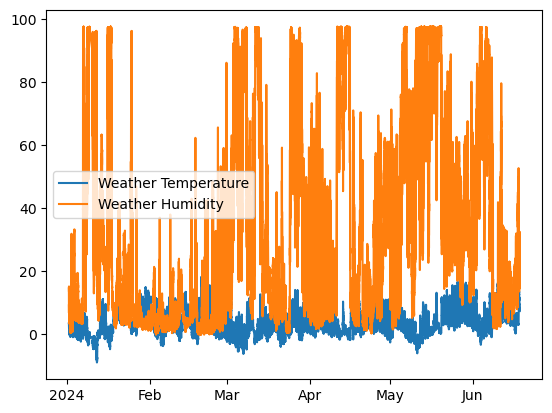

In [12]:
from telDav import FetchData
fetchData = FetchData.FetchData(startDatetime = '2024-01-01 17:00:00', 
                                stopDatetime  = '2024-06-20 06:00:00',
                                names = ['Weather Temperature', 'Weather Humidity'])
fetchData.run()
fetchData.draw()